In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import HourLocator, DateFormatter, MinuteLocator
import datetime
import numpy as np
import pandas as pd
import mplhep as hep
from L1AD_query import *

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use(hep.style.CMS)


In [28]:
# Functions

oms_date_format = '%Y-%m-%d %H:%M:%S'
l1ad_dict = {
    'l1_phys' : {'key' : 'l1a_physics_rate', 'label' : 'L1 Physics Rate'},
    'looser'  : {'key' : 'l1_adt_80_rate', 'label' : 'L1AD Score > 5'},
    'loose'   : {'key' : 'l1_adt_400_rate', 'label' : 'L1AD Score > 25'},
    'tight'   : {'key' : 'l1_adt_4000_rate', 'label' : 'L1AD Score > 250'},
    'tighter' : {'key' : 'l1_adt_20000_rate', 'label' : 'L1AD Score > 1250'},
}

def get_color():
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][::-1]
    i = 0
    while True:
        yield colors[i]
        i = (i + 1) % len(colors)

def plot_run(df, runnumber, l1ad_bits, label=None, year=2023, com=None, lumi=None, timestamps=None, normalize=False, logy=True):
    run_df = rate_df.query(f'runnumber  == {float(runnumber)}')
    if normalize: run_df /= run_df.max()
    run_df.index.strftime('%H:%M')

    ax = run_df.plot(kind='line', use_index=True, y=[l1ad_dict[item]['key'] for item in l1ad_dict.keys() if item in l1ad_bits], figsize=(10, 10))
    ax.legend([l1ad_dict[item]['label'] for item in l1ad_dict.keys() if item in l1ad_bits])
    ax.set_ylabel(f'Rate {"[A.U.]" if normalize else "[Hz]"}')
    ax.set_xlabel('Time [UTC]')
    if logy: plt.yscale('log')

    if timestamps:
        yrange = ax.get_ylim()[1]-ax.get_ylim()[0]
        if 'log' in ax.get_yscale():
            y_values = np.logspace(np.log10(ax.get_ylim()[1])*.25, np.log10(ax.get_ylim()[1])*.88, num=len(timestamps))[::-1]
        else:
            y_values = np.linspace(ax.get_ylim()[1]*.25,ax.get_ylim()[1]*.88, num=len(timestamps))[::-1]
        colors = get_color()
        for i, (time, text) in enumerate((timestamps.items())):
            col = next(colors)
            plt.axvline(x=pd.Timestamp(time), linestyle='--', color=col)
            plt.text(x=pd.Timestamp(time), y=y_values[i], s=text, color=col, fontsize='xx-small')

    hep.cms.label(f'Run {runnumber}' if label is None else label, data=True, year=year, com=com,lumi=lumi)
    plt.show()

def plot_fill(df, runrange, l1ad_bits, label=None, year=2023, com=None, lumi=None, timestamps=None, normalize=False, logy=True):
    # plt.figure(figsize=(10,2))
    run_df = rate_df.query(f'runnumber  >= {float(runrange[0])} & runnumber <= {float(runrange[1])}')
    if normalize: run_df /= run_df.max()
    ax = run_df.plot(kind='line', use_index=True, y=[l1ad_dict[item]['key'] for item in l1ad_dict.keys() if item in l1ad_bits], figsize=(20, 8))
    run_df.index.strftime('%H:%M')
    hour_locator = HourLocator(interval=1)
    minute_locator = MinuteLocator(interval=10) 
    ax.xaxis.set_major_locator(hour_locator)
    ax.xaxis.set_minor_locator(minute_locator)
    hour_formatter = DateFormatter('%H:%M') # format as hours and minutes
    ax.xaxis.set_major_formatter(hour_formatter)
    ax.legend([l1ad_dict[item]['label'] for item in l1ad_dict.keys() if item in l1ad_bits])
    ax.set_ylabel(f'Rate {"[A.U.]" if normalize else "[Hz]"}')
    ax.set_xlabel('Time [UTC]')
    if logy: plt.yscale('log')

    if timestamps:
        yrange = ax.get_ylim()[1]-ax.get_ylim()[0]
        if 'log' in ax.get_yscale():
            y_values = np.logspace(np.log10(ax.get_ylim()[1])*.25, np.log10(ax.get_ylim()[1])*.88, num=len(timestamps))[::-1]
        else:
            y_values = np.linspace(ax.get_ylim()[1]*.25,ax.get_ylim()[1]*.88, num=len(timestamps))[::-1]
        colors = get_color()
        for i, (time, text) in enumerate((timestamps.items())):
            col = next(colors)
            plt.axvline(x=pd.Timestamp(time), linestyle='--', color=col)
            plt.text(x=pd.Timestamp(time), y=y_values[i], s=text, color=col, fontsize='xx-small')

    hep.cms.label(f'Fill' if label is None else label, data=True, year=year, com=com,lumi=lumi)
    plt.show()

In [34]:
%%capture
# Get AXOL1TL Data
make_axol1tl_query(start='2023-06-06 22:34:46', stop='2023-06-07 09:13:55',step=40)
rate_df = pd.read_pickle('AXOL1TL_Monitoring.pkl')

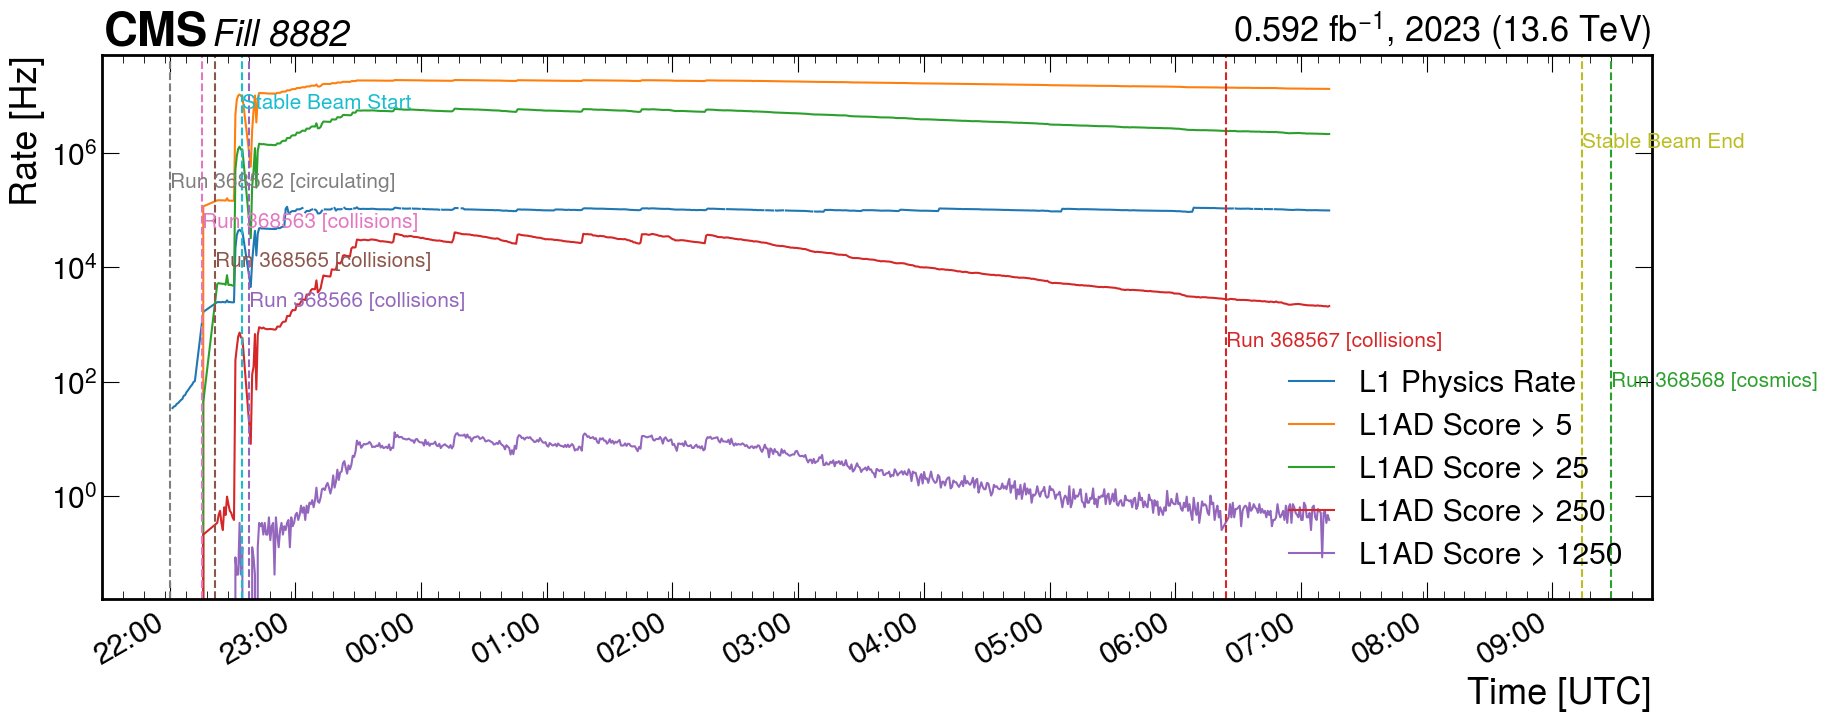

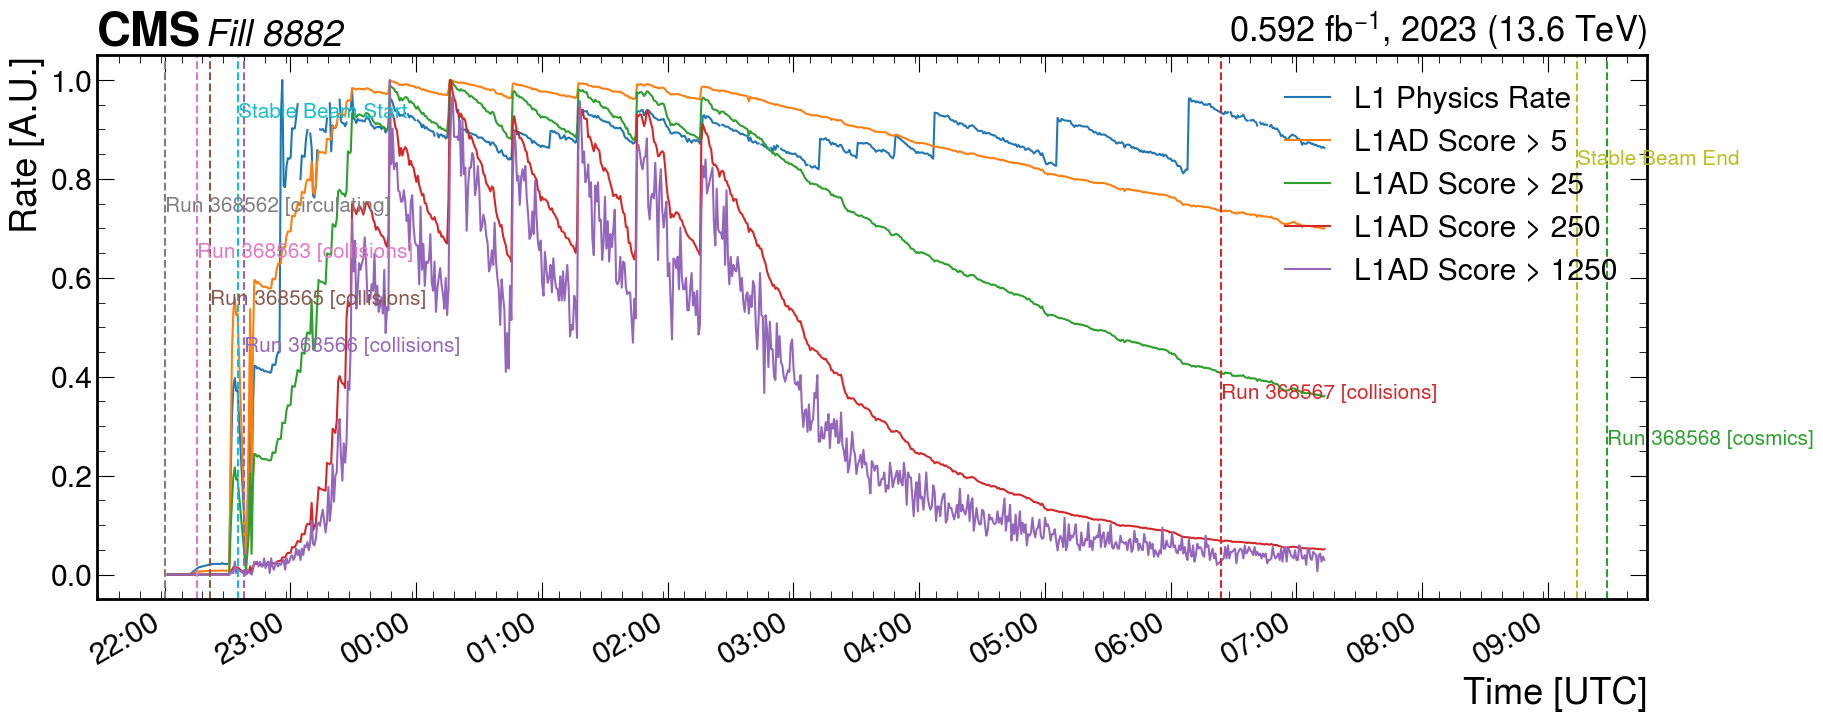

In [36]:
# Plot AXOL1TL Rates

# plot_run(rate_df, 366891, ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], lumi=0.0344, com=6.8)
# plot_run(rate_df, 365833, ['l1_phys','loose'], lumi=0.000002, com=.45)

# Fill 8559
# plot_fill(rate_df, [365879,365889], ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], label='Fill 8559', lumi=0.000001, com=.45, timestamps=timestamps)

# Fill 8550
# plot_fill(rate_df, [365824,365845], ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], label='Fill 8550', lumi=0.000002, com=.45, timestamps=timestamps)

# Fill 8696
# timestamps = {
#     # '2023-05-01 22:15:09' : 'Stable Beam Start',
#     # '2023-05-02 00:02:14' : 'Run 366895 [collisions]',
#     # # '2023-05-01 23:57:32' : 'Run 366894 [collisions]',
#     # '2023-05-01 23:52:20' : 'Run 366893 [collisions]',
#     # '2023-05-01 23:47:44' : 'Run 366892 [collisions]',
#     # '2023-05-01 21:56:16' : 'Run 366891 [collisions]',
#     # '2023-05-01 21:19:23' : 'Run 366889 [circulating]',
#     # '2023-05-01 21:05:39' : 'Run 366888 [collisions]',
#     # '2023-05-01 21:00:09' : 'Run 366887 [collisions]',
#     # '2023-05-01 20:57:26' : 'Run 366886 [collisions]',
#     # '2023-05-01 20:53:32' : 'Run 366885 [collisions]',
#     # '2023-05-01 20:48:28' : 'Run 366884 [circulating]',
#     # '2023-05-01 20:09:15' : 'Run 366882 [circulating]',
#     # '2023-05-01 19:58:27' : 'Run 366880 [cosmics]',
#     # '2023-05-01 19:38:51' : 'Run 366879 [cosmics]',
#     # '2023-05-01 19:32:07' : 'Run 366878 [cosmics]',
#     # '2023-05-01 19:27:13' : 'Run 366877 [cosmics]',
#     '2023-05-02 02:32:33' : 'ECAL Preshower subsystem soft_error recovery',
#     '2023-05-02 02:15:16' : 'ECAL Preshower subsystem soft_error recovery',
#     '2023-05-02 08:09:48' : 'Tracker subsystem soft_error recovery',
#     '2023-05-02 08:31:21' : 'Tracker subsystem soft_error recovery',
# }

# plot_fill(rate_df, [366877,366895], ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], label='Fill 8696', lumi=0.237, com=6.8, timestamps=timestamps)
# plot_run(rate_df, 366895, ['l1_phys', 'loose'], lumi=0.211, com=6.8)

# Fill 8701
# timestamps = {
#     '2023-05-03 00:55:26' : 'Stable Beam Start',
#     '2023-05-03 08:31:09' : 'Stable Beam End',
#     '2023-05-02 23:07:21' : 'Run 366931 [circulating]',
#     '2023-05-03 00:17:22' : 'Run 366932 [circulating]',
#     '2023-05-03 00:35:24' : 'Run 366933 [collisions]',
#     '2023-05-03 09:10:10' : 'Run 366936 [cosmics]',
# }

# plot_fill(rate_df, [366924,366942], ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], label='Fill 87701', lumi=0.207, com=6.8, timestamps=timestamps)
# plot_run(rate_df, 366895, ['l1_phys', 'loose'], lumi=0.211, com=6.8)

# # Fill 8754
# timestamps = {
#     '2023-05-12 16:37:24 14:37:24' : 'Stable Beam Start',
#     '2023-05-13 06:04:41 04:04:41' : 'Stable Beam End',
#     '2023-05-12 17:44:36' : 'L1 Global Trigger Config Problem',
#     '2023-05-13 02:45:03' : 'PIXEL Reconfig',
#     '2023-05-12 17:47:13' : 'Run 367413 [collisions]',
#     '2023-05-12 14:19:53' : 'Run 367406 [collisions]',
#     # '2023-05-17 05:58:06' : 'Run 367617 [collisions]',
#     # '2023-05-03 09:10:10' : 'Run 366936 [cosmics]',
# }
# plot_fill(rate_df, [367401,367417], ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], label='Fill 8754', lumi=0.655, com=6.8, timestamps=timestamps)

# # Fill 8784
# timestamps = {
#     '2023-05-17 22:24:03' : 'Stable Beam Start',
#     '2023-05-18 03:13:38' : 'Stable Beam End',
#     # '2023-05-17 02:07:51' : 'Run 367613 [circulating]',
#     # '2023-05-17 02:28:57' : 'Run 367615 [collisions]',
#     # '2023-05-17 05:54:06' : 'Run 367616 [collisions]',
#     # '2023-05-17 05:58:06' : 'Run 367617 [collisions]',
#     # '2023-05-03 09:10:10' : 'Run 366936 [cosmics]',
# }
# # plot_run(rate_df, 367615, ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], lumi=0.000001, com=.450)
# plot_fill(rate_df, [367657,367667], ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], label='Fill 8784', lumi=0.262, com=6.8, timestamps=timestamps)

# # # Fill 8821
# timestamps = {
#     # '2023-05-17 22:24:03' : 'Stable Beam Start',
#     # '2023-05-18 03:13:38' : 'Stable Beam End',
#     # '2023-05-17 02:07:51' : 'Run 367613 [circulating]',
#     # '2023-05-17 02:28:57' : 'Run 367615 [collisions]',
#     # '2023-05-17 05:54:06' : 'Run 367616 [collisions]',
#     # '2023-05-17 05:58:06' : 'Run 367617 [collisions]',
#     # '2023-05-03 09:10:10' : 'Run 366936 [cosmics]',
# }
# # plot_run(rate_df, 367615, ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], lumi=0.000001, com=.450)
# plot_fill(rate_df, [367880,367884], ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], label='Fill 8821', lumi=0.262, com=6.8, timestamps=timestamps)

# Fill 8882
timestamps = {
    '2023-06-06 22:34:46' : 'Stable Beam Start',
    '2023-06-07 09:13:55' : 'Stable Beam End',
    '2023-06-06 22:00:13' : 'Run 368562 [circulating]',
    '2023-06-06 22:15:27' : 'Run 368563 [collisions]',
    '2023-06-06 22:21:42' : 'Run 368565 [collisions]',
    '2023-06-06 22:37:55' : 'Run 368566 [collisions]',
    '2023-06-07 06:24:20' : 'Run 368567 [collisions]',
    '2023-06-07 09:28:10' : 'Run 368568 [cosmics]',
}
# plot_run(rate_df, 368566, ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], lumi=0.467, com=13.6)
# plot_run(rate_df, 368566, ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], lumi=0.467, com=13.6, normalize=True, logy=False)
plot_fill(rate_df, [368562,368581], ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], label='Fill 8882', lumi=0.592, com=13.6, timestamps=timestamps)
plot_fill(rate_df, [368562,368581], ['l1_phys', 'looser', 'loose', 'tight', 'tighter'], label='Fill 8882', lumi=0.592, com=13.6, timestamps=timestamps, normalize=True, logy=False)


In [37]:
%%capture
# Get TOPO Data
make_topo_query(start='2023-06-06 21:17:15', stop='now')
rate_df = pd.read_pickle('TOPO_Monitoring.pkl')

In [ ]:
# Plot TOPO Rates
l1ad_dict = {
    'l1_phys'  : {'key' : 'l1a_physics_rate', 'label' : 'L1 Physics Rate'},
    'muon'     : {'key' : 'L1_SingleMu22', 'label' : 'L1_SingleMu22'},
    'looser'   : {'key' : 'L1_TOPO_25', 'label' : 'L1_TOPO_25'},
    'loose'    : {'key' : 'L1_TOPO_154', 'label' : 'L1_TOPO_154'},
    'tight'    : {'key' : 'L1_TOPO_904', 'label' : 'L1_TOPO_904'},
    'tighter'  : {'key' : 'L1_TOPO_1007', 'label' : 'L1_TOPO_1007'},
    'tightest' : {'key' : 'L1_TOPO_1023', 'label' : 'L1_TOPO_1023'},
}
# Fill 8882
timestamps = {
    # '2023-05-17 22:24:03' : 'Stable Beam Start',
    # '2023-05-18 03:13:38' : 'Stable Beam End',
    # '2023-05-17 02:07:51' : 'Run 367613 [circulating]',
    # '2023-05-17 02:28:57' : 'Run 367615 [collisions]',
    # '2023-05-17 05:54:06' : 'Run 367616 [collisions]',
    # '2023-05-17 05:58:06' : 'Run 367617 [collisions]',
    # '2023-05-03 09:10:10' : 'Run 366936 [cosmics]',
}
# plot_run(rate_df, 368566, ['l1_phys', 'looser', 'loose', 'tight', 'tighter', 'tightest', 'muon'], lumi=0.467, com=13.6)
# plot_run(rate_df, 368566, ['l1_phys', 'looser', 'loose', 'tight', 'tighter', 'tightest', 'muon'], lumi=0.467, com=13.6, normalize=True, logy=False)
plot_fill(rate_df, [368562,368581], ['l1_phys', 'looser', 'loose', 'tight', 'tighter', 'tightest', 'muon'], label='Fill 8882', lumi=0.592, com=13.6, timestamps=timestamps)
plot_fill(rate_df, [368562,368581], ['l1_phys', 'looser', 'loose', 'tight', 'tighter', 'tightest', 'muon'], label='Fill 8882', lumi=0.592, com=13.6, timestamps=timestamps, normalize=True, logy=False)
